# Loading the libraries

In [7]:
library(openair)
library(dplyr)
library(openairmaps)
library(latex2exp)
library(worldmet)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Datasets used are: 
#### a) Joappa Variogram data for 1st week of Jan 2023, 
#### b) Joappa pm data for Dec 2022, 
#### c) NOAA weather station data for dfw
#### d) Sample data from openair

# NOAA DFW Weather Station data

In [17]:
url_ips7100 = "https://ncsa.osn.xsede.org/ees230012-bucket01/AirQualityNetwork/data/raw/Central_Hub_1/2023/03/02/MINTS_001e06318c91_IPS7100_2023_03_02.csv"
url_bme280 = "https://ncsa.osn.xsede.org/ees230012-bucket01/AirQualityNetwork/data/raw/Central_Hub_1/2023/03/02/MINTS_001e06318c91_BME280_2023_03_02.csv"
url_wimda = "https://ncsa.osn.xsede.org/ees230012-bucket01/AirQualityNetwork/data/raw/Central_Hub_1/2023/03/02/MINTS_001e0642c3d6_WIMDA_2023_03_02.csv"

In [18]:
df_pm = read.csv(url_ips7100, header = TRUE, sep = ",")
df_tph = read.csv(url_bme280, header = TRUE, sep = ",")
df_wimda = read.csv(url_wimda, header = TRUE, sep = ",")
#write.csv(df_pm, "D:\\UTD\\UTDSummer2023\\mints-aq-reports\\ips.csv", row.names=FALSE)
#write.csv(df_tph, "D:\\UTD\\UTDSummer2023\\mints-aq-reports\\bme.csv", row.names=FALSE)

Warning message in file(file, "rt"):
"cannot open URL 'https://ncsa.osn.xsede.org/ees230012-bucket01/AirQualityNetwork/data/raw/Central_Hub_1/2023/03/02/MINTS_001e0642c3d6_WIMDA_2023_03_02.csv': HTTP status was '404 Not Found'"


ERROR: Error in file(file, "rt"): cannot open the connection


In [10]:
pm_labels = c(
    'pm0_1'= 'PM$_{0.1}$',
    'pm0_3'= 'PM$_{0.3}$',
    'pm0_5'= 'PM$_{0.5}$',
    'pm1_0'= 'PM$_{1}$',
    'pm2_5'= 'PM$_{2.5}$',
    'pm5_0'= 'PM$_5$',
    'pm10_0'= 'PM$_{10}$'
)

pc_labels = c(
    'pc0_1'= 'PC$_{0.1}$',
    'pc0_3'= 'PC$_{0.3}$',
    'pc0_5'= 'PC$_{0.5}$',
    'pc1_0'= 'PC$_{1}$',
    'pc2_5'= 'PC$_{2.5}$',
    'pc5_0'= 'PC$_5$',
    'pc10_0'= 'PC$_{10}$'
)


In [11]:
# worldmet provides an easy way in which to access 
# surface meteorological data from >30,000 sites across the world
# The package accesses the NOAA webservers to download hourly data for stations. 
# Github: https://github.com/davidcarslaw/worldmet and 
# https://www.ncdc.noaa.gov/isd for further information.

getMeta(lat = 32.77, lon = -96.800, returnMap = TRUE)#Sites close to Dallas downtown


HTML widgets cannot be represented in plain text (need html)

In [12]:

getMeta()#gives a list of all sites in the world with 
#the code => similar to the location id, then the start date and end date

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>
010060,99999,EDGEOYA,NO,NA,NA,78.250,22.817,14.0,1973-01-01,2023-06-08,010060-99999
010070,99999,NY-ALESUND,SV,NA,NA,78.917,11.933,7.7,1973-01-06,2023-06-08,010070-99999
010080,99999,LONGYEAR,SV,NA,ENSB,78.246,15.466,26.8,1975-09-29,2023-06-08,010080-99999
010090,99999,KARL XII OYA,SV,NA,NA,80.650,25.000,5.0,1955-01-01,2023-05-25,010090-99999
010100,99999,ANDOYA,NO,NA,ENAN,69.293,16.144,13.1,1931-01-03,2023-06-08,010100-99999
010110,99999,KVITOYA,SV,NA,NA,80.067,31.500,10.0,1986-11-18,2023-06-07,010110-99999
010150,99999,HEKKINGEN FYR,NO,NA,NA,69.600,17.833,14.0,1980-03-14,2023-06-08,010150-99999
010160,99999,KONGSOYA,NO,NA,NA,78.933,28.900,20.0,1993-05-01,2023-06-04,010160-99999
010170,99999,AKSELOYA,SV,NA,NA,77.683,14.783,6.0,1973-01-01,2023-06-04,010170-99999


In [13]:
addison_meta <- importNOAA(code = "722598-03970", year = 2022)
addison_meta

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,...,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 00:00:00,32.96861,-96.83639,196.3,3.600000,150.000000,21.000000,NA,...,22000.0000,0.000000,NA,NA,0.000000,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 01:00:00,32.96861,-96.83639,196.3,2.100000,120.000000,21.000000,NA,...,914.0000,NA,NA,NA,NA,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 02:00:00,32.96861,-96.83639,196.3,0.750000,105.000000,19.700000,NA,...,914.0000,NA,NA,NA,NA,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 03:00:00,32.96861,-96.83639,196.3,3.075000,117.780235,19.500000,NA,...,982.7500,NA,NA,NA,NA,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 04:00:00,32.96861,-96.83639,196.3,2.933333,150.569907,19.500000,NA,...,711.6667,NA,NA,NA,NA,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 05:00:00,32.96861,-96.83639,196.3,3.933333,203.143746,20.433333,NA,...,610.0000,8.000000,NA,NA,8.000000,549.0000,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 06:00:00,32.96861,-96.83639,196.3,2.266667,300.479225,18.566667,NA,...,416.3333,6.333333,8,NA,8.000000,345.3333,472.5,NA,NA,"rain, not freezing, slight"
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 07:00:00,32.96861,-96.83639,196.3,1.700000,4.152686,17.533333,NA,...,782.3333,6.333333,8,NA,8.000000,711.3333,823.0,NA,NA,"rain, not freezing, slight"
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2022-01-01 08:00:00,32.96861,-96.83639,196.3,0.500000,360.000000,17.166667,NA,...,1422.3333,5.000000,6,7.333333,7.333333,904.0000,1402.0,2072.667,NA,"rain, not freezing, slight"


# Wind Rose

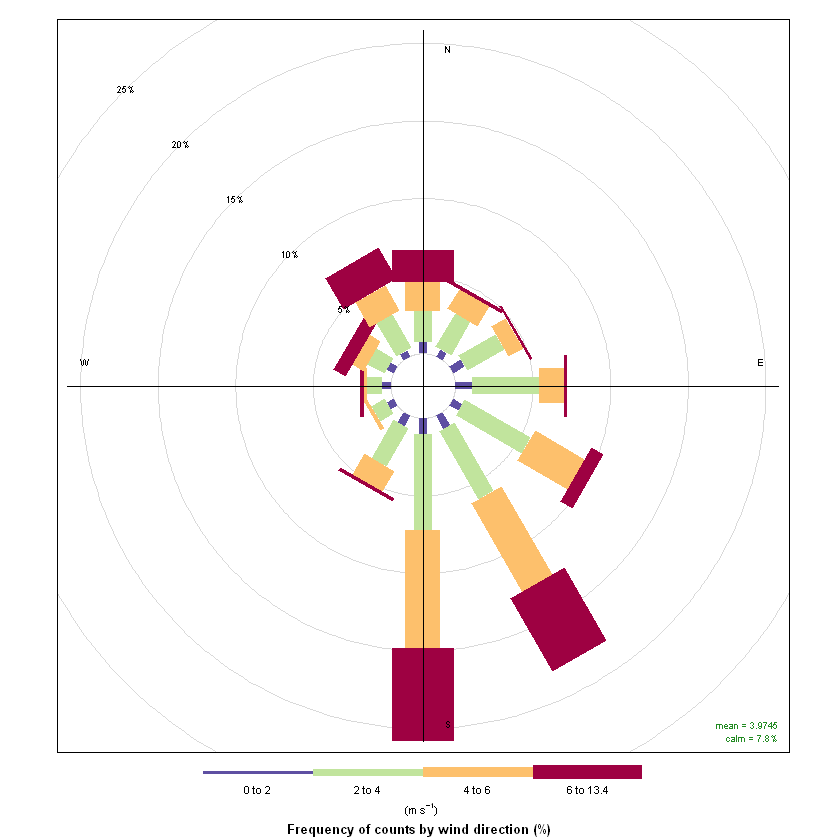

In [6]:
windRose(addison_meta,par.settings=list(fontsize=list(text=8)))

In [7]:
#Yearly data
addison_meta_yearly <- importNOAA(code = "722598-03970",year = 2014:2023)
addison_meta_yearly

Importing NOAA Data ===>---------------------------   10% |  ETA:  1m
Importing NOAA Data ======>------------------------   20% |  ETA:  1m
Importing NOAA Data =========>---------------------   30% |  ETA:  1m
Importing NOAA Data ============>------------------   40% |  ETA:  1m
Importing NOAA Data ===============>---------------   50% |  ETA: 43s
Importing NOAA Data ==================>------------   60% |  ETA: 35s
Importing NOAA Data =====================>---------   70% |  ETA: 26s
Importing NOAA Data ========================>------   80% |  ETA: 17s
Importing NOAA Data ===========================>---   90% |  ETA:  9s
                                                                     


code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,...,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 01:00:00,32.96861,-96.83639,196.3,4.100000,140.0000,7,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 02:00:00,32.96861,-96.83639,196.3,5.100000,160.0000,7,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 03:00:00,32.96861,-96.83639,196.3,5.025000,163.8644,6,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 04:00:00,32.96861,-96.83639,196.3,5.500000,163.4510,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 05:00:00,32.96861,-96.83639,196.3,3.766667,166.3749,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 06:00:00,32.96861,-96.83639,196.3,3.933333,170.0000,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 07:00:00,32.96861,-96.83639,196.3,3.766667,176.3749,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 08:00:00,32.96861,-96.83639,196.3,3.766667,166.8182,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA
722598-03970,"DALLAS ADDISON AIRPORT, TX US",2014-01-01 09:00:00,32.96861,-96.83639,196.3,4.433333,166.5449,NA,NA,...,22000,0,NA,NA,0,NA,NA,NA,NA,NA


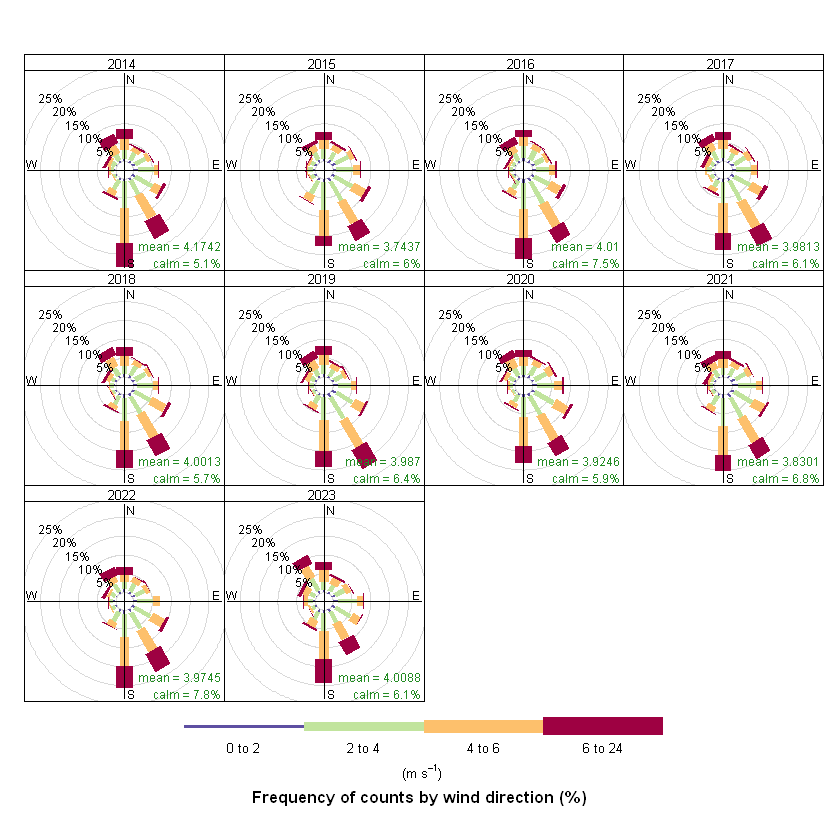

In [8]:
windRose(addison_meta_yearly, type = "year",
         par.settings=list(fontsize=list(text=10)))


# Analysing the variogram data (Jan 1st 2023 - Jan 7th 2023)

In [9]:
#Applying the plots on the variogram data

#Loaded the Variogram data(it contains the time scale, wind speed, wind direction and the temp,press, humidity)
wind_data = read.csv("D:\\UTD\\UTDFall2022\\VariogramsLoRa\\firmware\\data\\Parameters\\csv\\Wind_TPH_Range.csv")
#wind_data = subset(wind_data,date == '2023-01-03')

#Creating an array with all the time scales
pm_range = c(wind_data$pm0.1,wind_data$pm0.3,wind_data$pm0.5,
             wind_data$pm1.0,wind_data$pm2.5,wind_data$pm5.0,
             wind_data$pm10.0)
pm_range = na.omit(pm_range)


#Specifying the upper limit and lower limit on the color bar using the pm_range aka all the time scales
lim = quantile(pm_range, c(0.05,.95))
#lim = c(min(pm_range),max(pm_range))

# For simplicity, I am copying the data into the variable specified in the package, 
# in order to avoid errors, because the data is in tibble format.
# We can create our own tibble, but make sure all the columns in the tibble are
# following the same data type as mentioned in the example:

mydata_sample = mydata[c(1:nrow(wind_data)),]# sub-setting the mydata(the variable specified in the package) variable 
#Copied all the data from the wind_data variable to mydata_sample
mydata_sample$date = as.POSIXct(wind_data$RollingTime,format="%Y-%m-%dT%H:%M:%S")
mydata_sample$pm2.5 = round(wind_data$pm2.5,digits = 2)
mydata_sample$ws = wind_data$MeanWindSpeed
mydata_sample$wd = wind_data$MeanWindDirection
mydata_sample$lat = c(32.715)
mydata_sample$lon = c(-96.748)
mydata_sample$Temperature = wind_data$MeanTemperature
mydata_sample$Pressure = wind_data$MeanPressure
mydata_sample$Humidity = wind_data$MeanHumidity

#Removed the unwanted variables from the tibble
#mydata_sample = subset(mydata_sample, select = -c(so2,no2,o3,nox,pm10,co,pm25))

#Created the color code, as the default color code was the reverse of this
#We can use Rs colorbrewer package to figure the hex code for the color bars
rev_default_col = c("#9E0142","#FA8C4E","#FFFFBF","#88D1A4","#5E4FA2")

#Added the title
title = "01/01/2023 - 01/07/2023"


In [10]:
mydata_sample

date,ws,wd,nox,no2,o3,pm10,so2,co,pm25,pm2.5,lat,lon,Temperature,Pressure,Humidity
<dttm>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-01-01 00:15:00,0.2644444,258.1367,285,39,1,29,4.7225,3.3725,NA,NA,32.715,-96.748,13.88,99.58,67.79
2023-01-01 00:15:02,0.2640000,258.1942,NA,NA,NA,37,NA,NA,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:04,0.2635556,258.2518,NA,NA,3,34,6.8300,9.6025,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:06,0.2635556,258.3064,493,52,3,35,7.6625,10.2175,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:08,0.2635556,258.3611,468,78,2,34,8.0700,8.9125,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:10,0.2640000,258.3176,264,42,0,16,5.5050,3.0525,NA,NA,32.715,-96.748,13.88,99.58,67.79
2023-01-01 00:15:12,0.2644444,258.2740,171,38,0,11,4.2300,2.2650,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:14,0.2648889,258.2304,195,51,0,12,3.8750,1.9950,NA,NA,32.715,-96.748,NA,NA,NA
2023-01-01 00:15:16,0.2651111,258.1553,137,42,1,12,3.3475,1.4550,NA,NA,32.715,-96.748,NA,NA,NA


# Pollution Rose

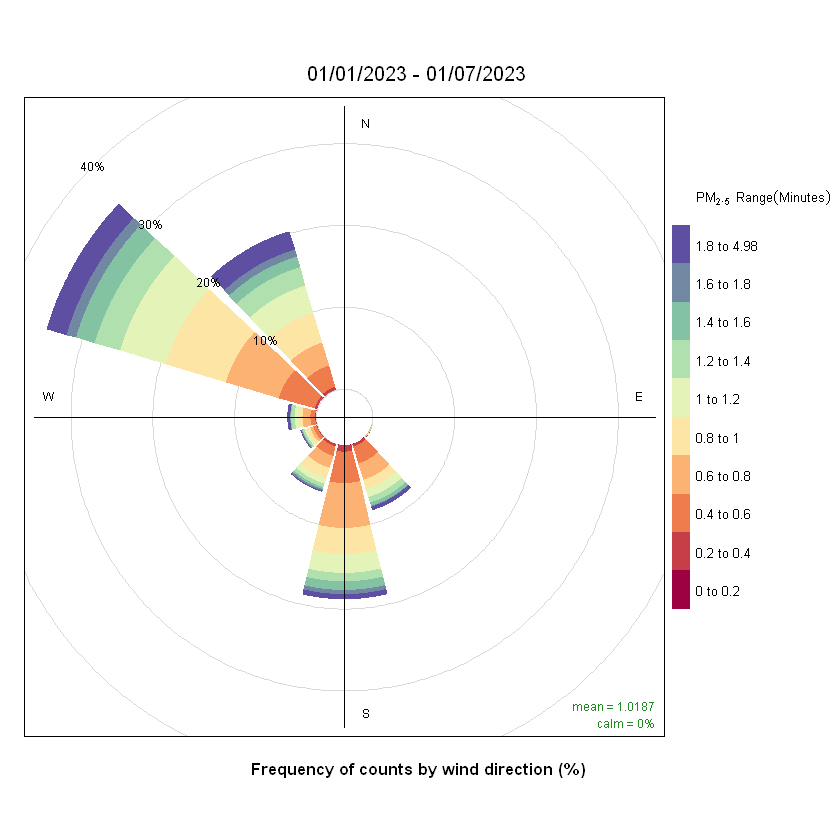

In [11]:
pollutionRose(mydata_sample, pollutant = "pm2.5",main = title,cols = rev_default_col,key.position = "right",
              key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'),  
              key.footer =NULL,
              limits = c(lim[1],lim[2]),par.settings=list(fontsize=list(text=10)))

Warning message:
"removing 527241 missing rows due to Temperature"


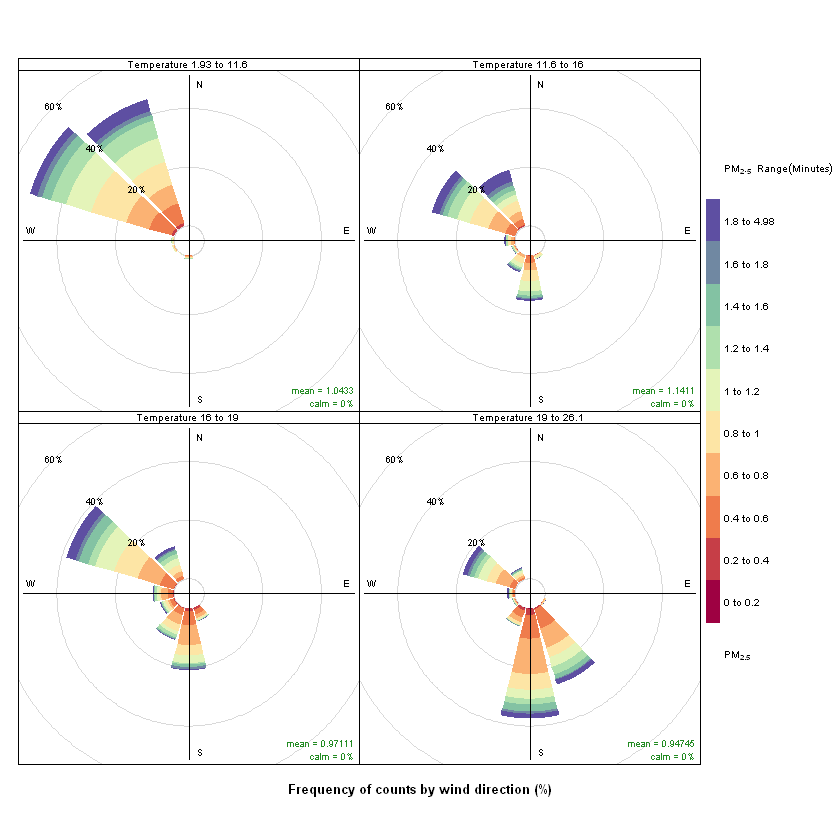

In [12]:
pollutionRose(mydata_sample,
              pollutant = "pm2.5",
              type = "Temperature",cols = rev_default_col,
              layout = c(2, 2),key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'),
              key.position = "right",par.settings=list(fontsize=list(text=7.5)))

Warning message:
"removing 527241 missing rows due to Pressure"


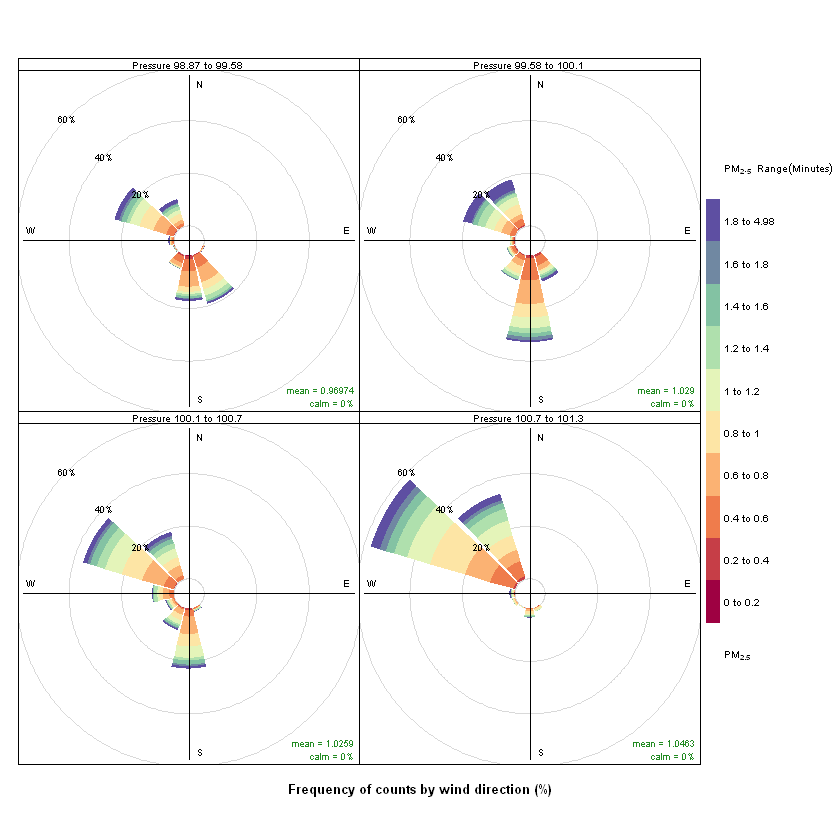

In [13]:
pollutionRose(mydata_sample,
              pollutant = "pm2.5",
              type = "Pressure",cols = rev_default_col,
              layout = c(2, 2),key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'),
              key.position = "right",par.settings=list(fontsize=list(text=7.5)))



Warning message:
"removing 527241 missing rows due to Humidity"


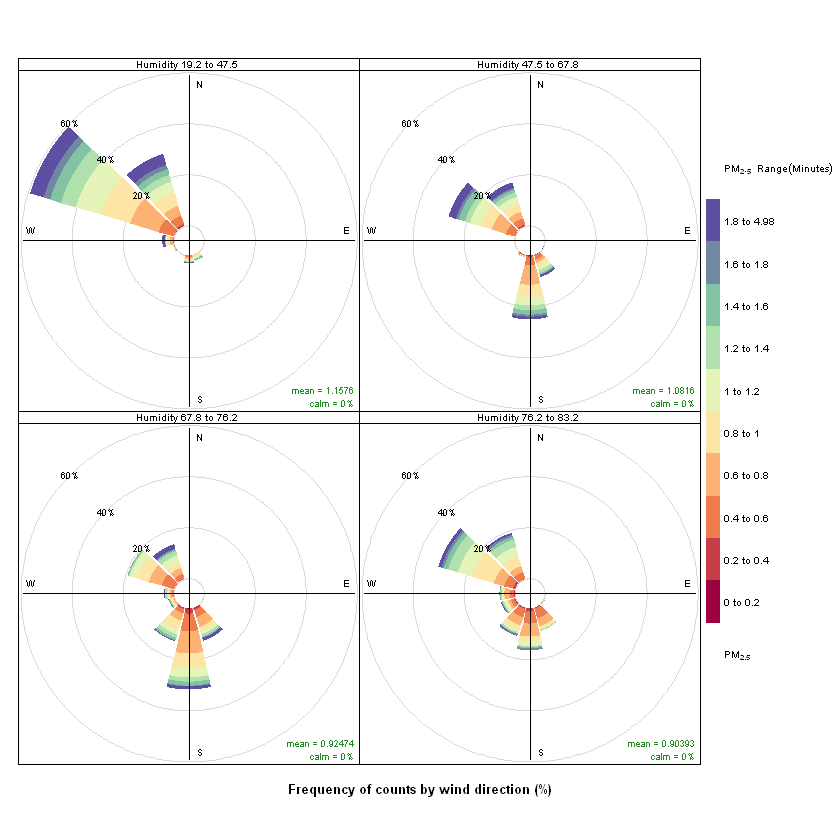

In [14]:
pollutionRose(mydata_sample,
              pollutant = "pm2.5",
              type = "Humidity",cols = rev_default_col,
              layout = c(2, 2),key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'),
              key.position = "right",par.settings=list(fontsize=list(text=7.5)))


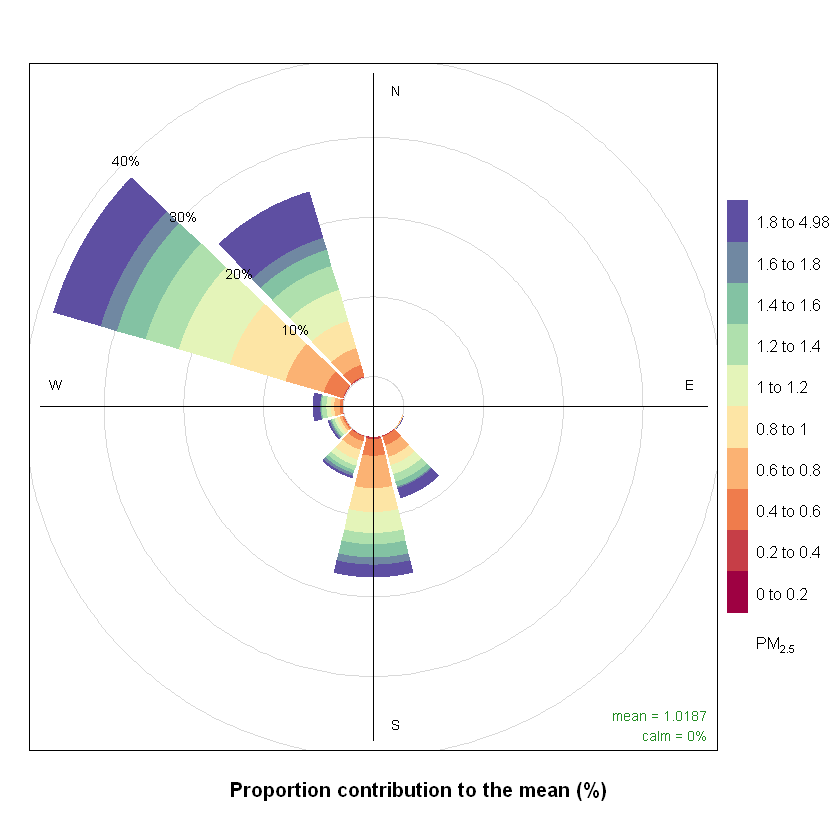

In [15]:
#Shows which wind dir. contributed the most
pollutionRose(mydata_sample, pollutant = "pm2.5", statistic = "prop.mean",cols = rev_default_col)

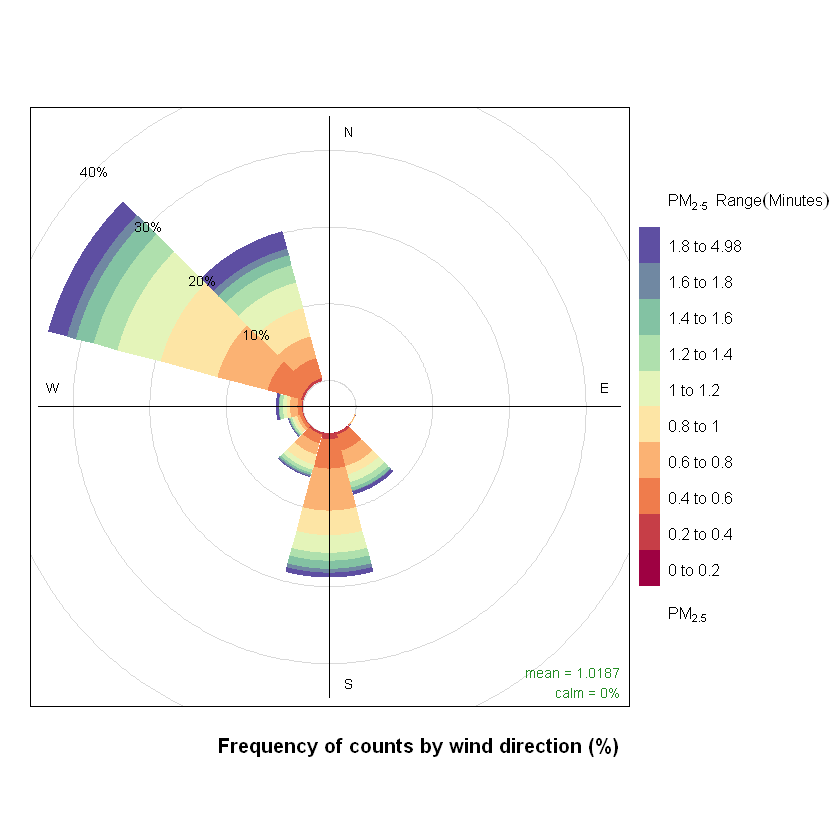

In [16]:
#Width of each angle segment is given by seg
pollutionRose(mydata_sample, pollutant = "pm2.5", seg = 1,cols = rev_default_col,
              key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'))

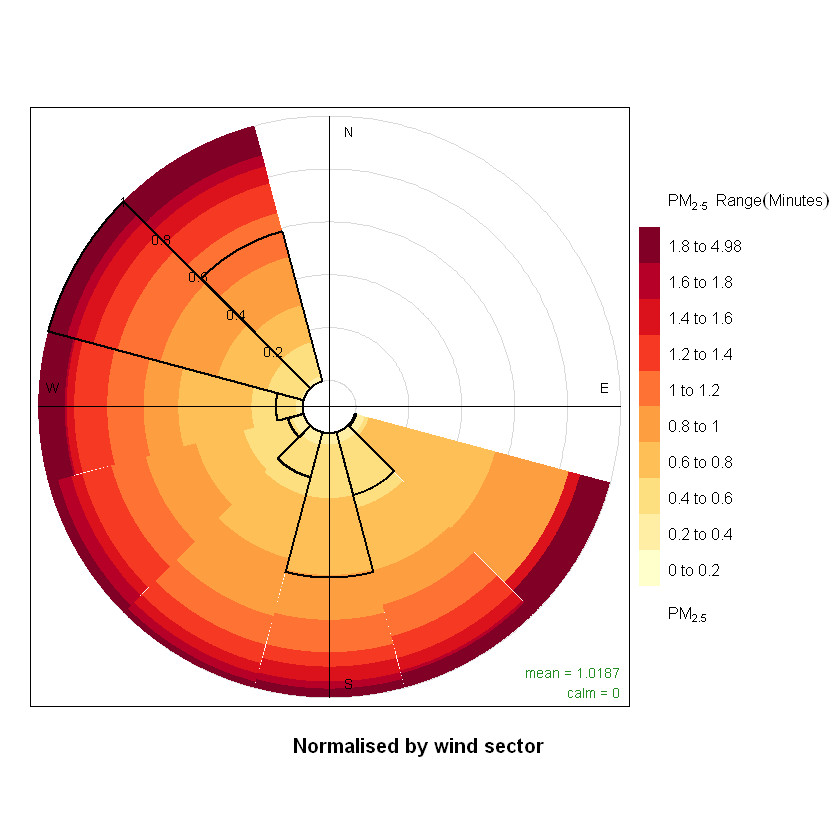

In [17]:
# All direction segments are normalised to 1(its good to use it when there are lesser values in certain directions)
pollutionRose(mydata_sample,
              pollutant = "pm2.5",
              normalise = TRUE,
              seg = 1,key.header = TeX('$\\PM_2._5\\ Range(Minutes)$'),
              cols = "heat")

# Polar Frequency Plot

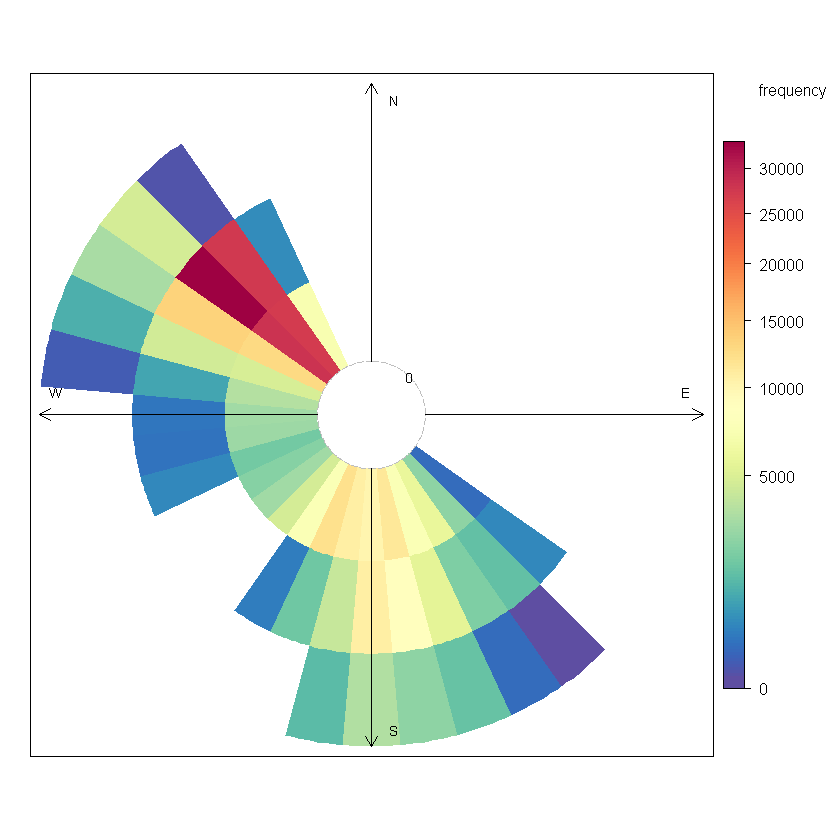

In [18]:
polarFreq(mydata_sample)

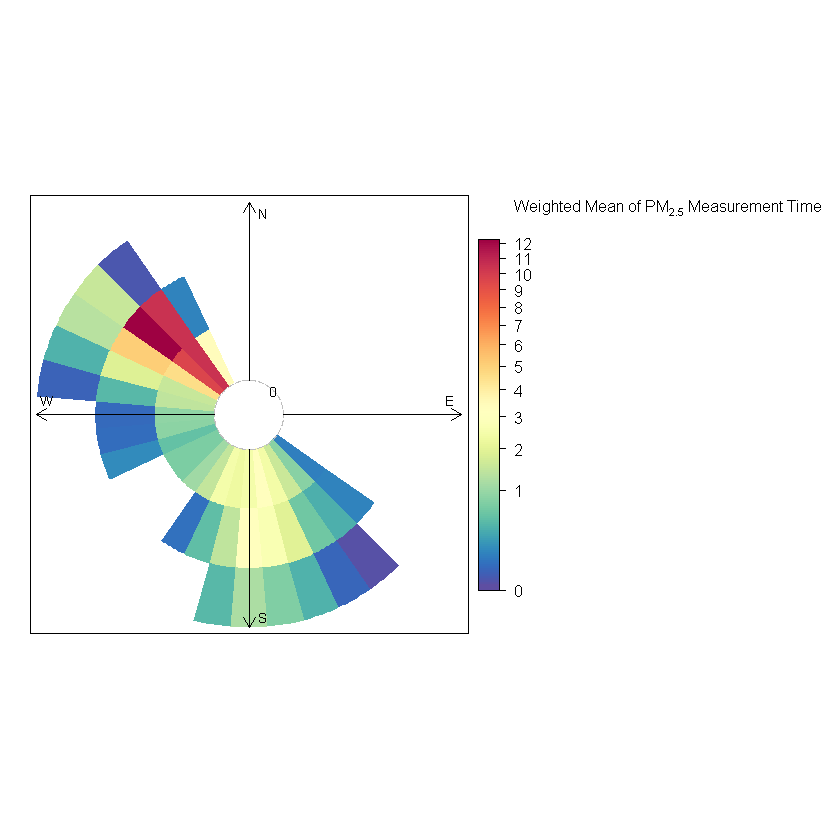

In [19]:
# weighted mean pm2.5 time scale
polarFreq(mydata_sample, pollutant = "pm2.5", 
           statistic = "weighted.mean", 
           key.header = "Weighted Mean of pm2.5 Measurement Time ", 
           key.footer =NULL,
          min.bin = 2)

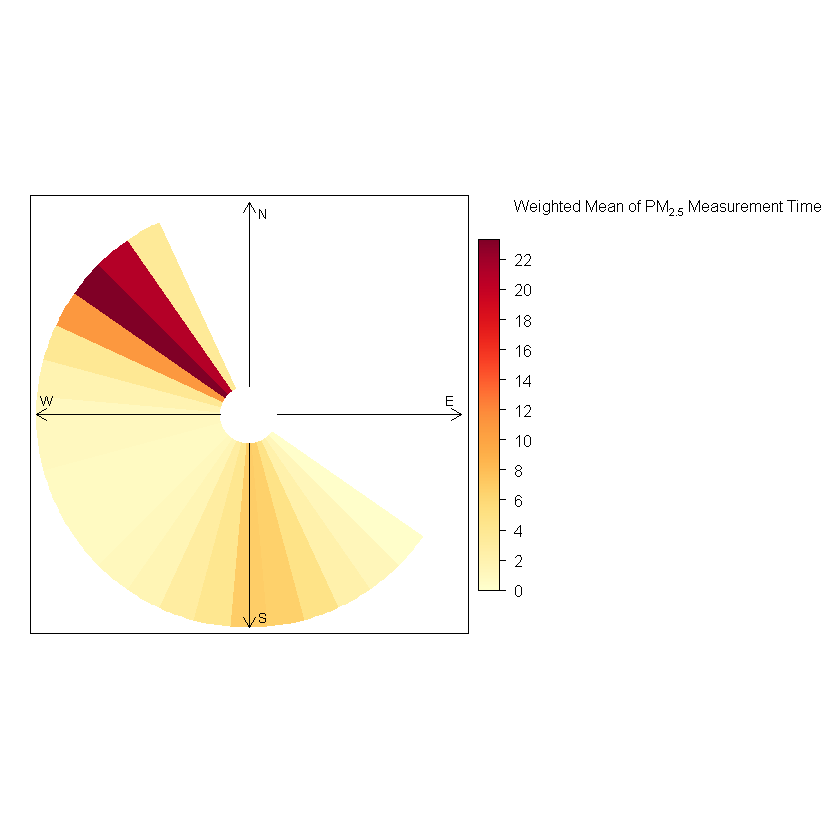

In [20]:
polarFreq(mydata_sample, pollutant = "pm2.5", ws.int = 30, 
           key.header = "Weighted Mean of pm2.5 Measurement Time ", 
          key.footer =NULL,
          statistic = "weighted.mean",
          offset = 80, trans = FALSE, 
          col = "heat")

# Polar Annulus

## Hourly data

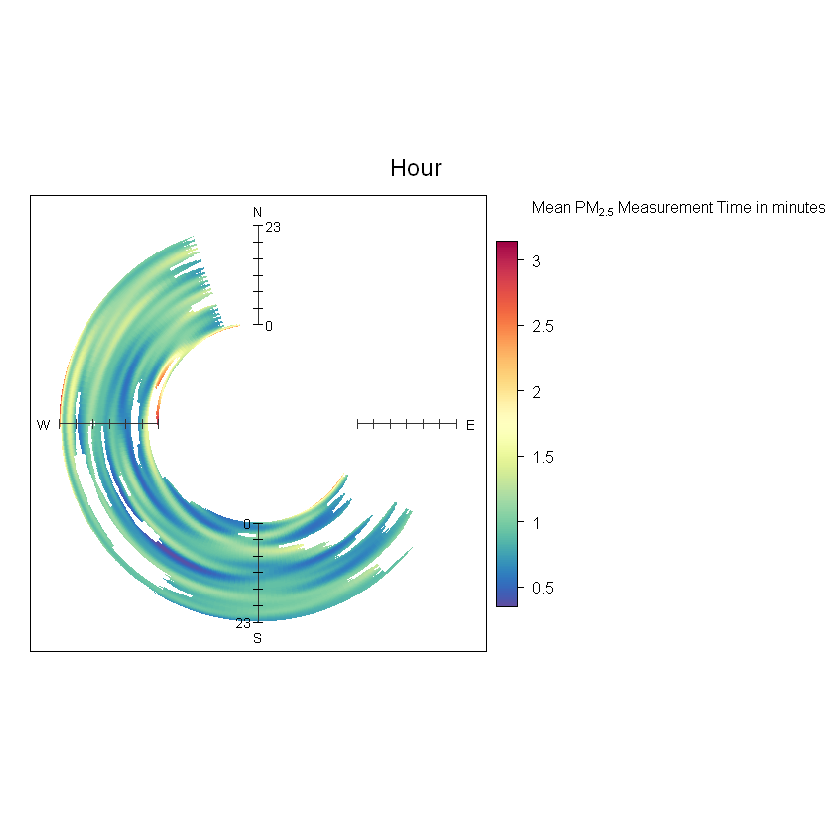

In [21]:
polarAnnulus(mydata_sample, 
             pollutant = "pm2.5",
             key.header = "Mean pm2.5 Measurement Time in minutes",
             key.footer = NULL,
             period = "hour", 
             main = "Hour")

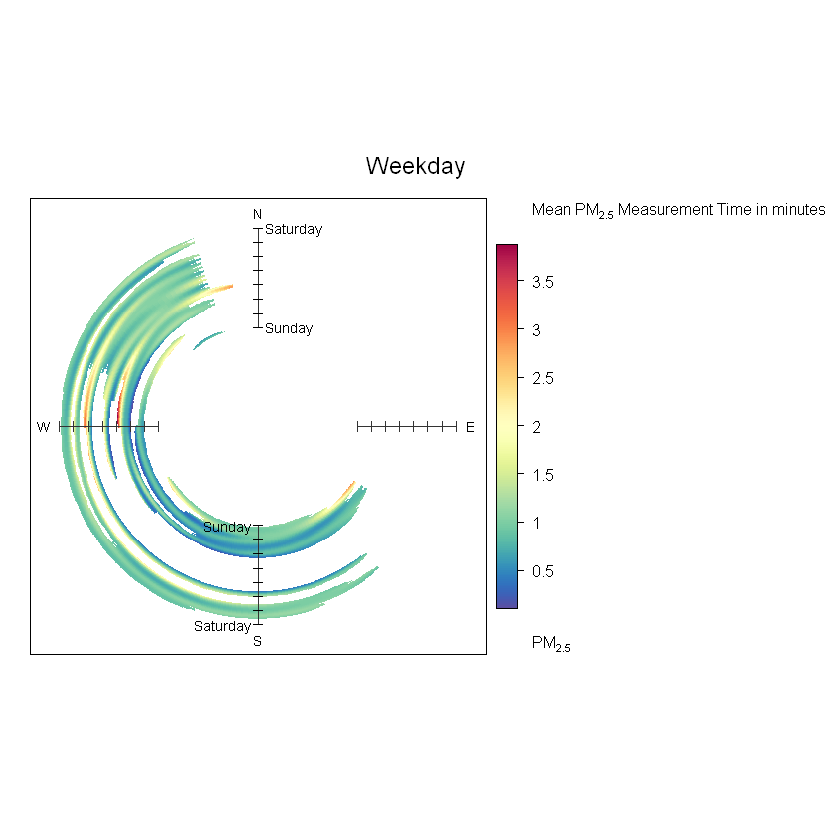

In [22]:
polarAnnulus(mydata_sample, 
             pollutant = "pm2.5", 
             period = "weekday", 
             main = "Weekday",key.header = "Mean pm2.5 Measurement Time in minutes",)

In [23]:
# ## wind speed > 10th percentile
# polarAnnulus(filter(
#   mydata, 
#   ws > quantile(ws, probs = 0.1, na.rm = TRUE)
#   ),
#   pollutant ="pm10", 
#   type = "hour")

# Polar Plot

## Statistic

### 1) Statistic =  "NWR"

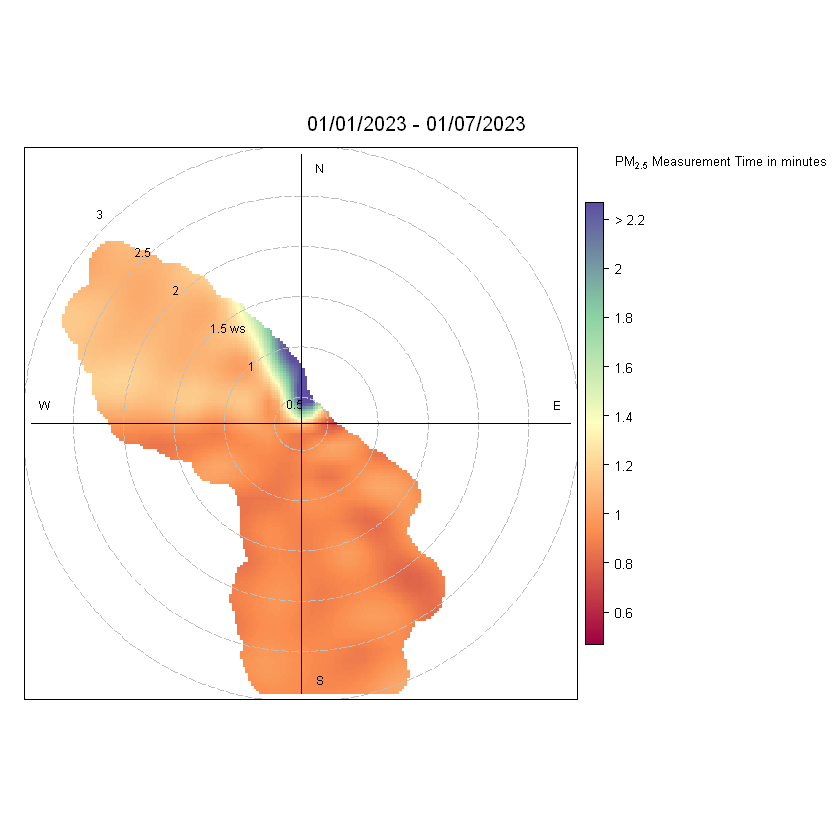

In [24]:
#Created the polar plot for wind speed vs wind direction vs time scale
polarPlot(mydata_sample,pollutant = "pm2.5",main = title,k =30,cols = rev_default_col,key.position = "right",
          key.header = "pm2.5 Measurement Time in minutes",  
          key.footer =NULL,statistic = "nwr",
          limits = c(lim[1],lim[2]),par.settings=list(fontsize=list(text=10)))

### 2) Staistic =  "CPF"

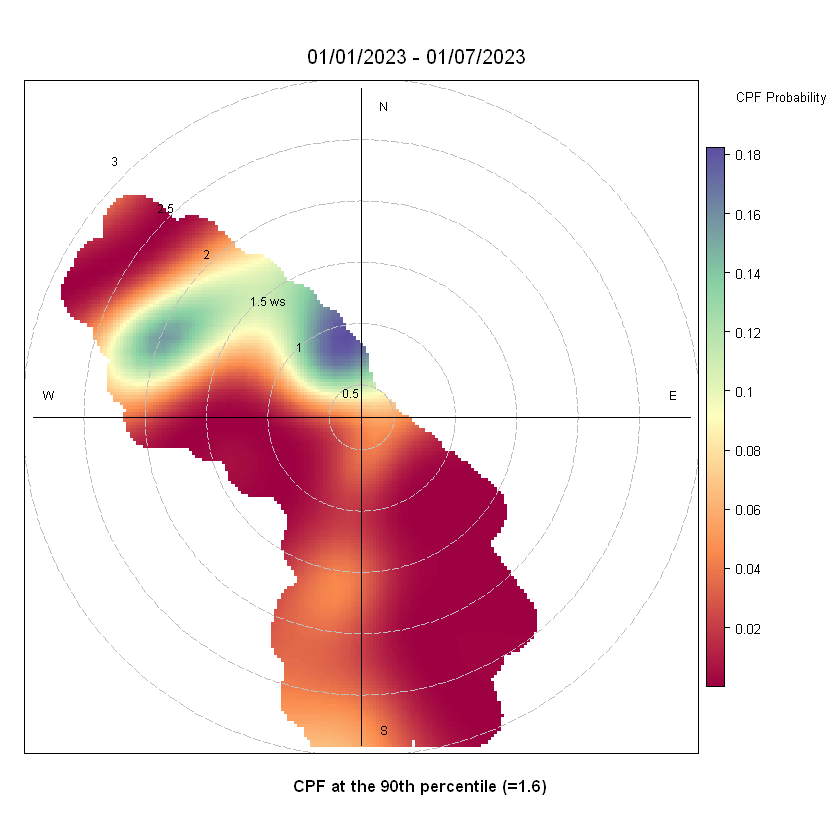

In [25]:
# With the limits
polarPlot(mydata_sample,pollutant = "pm2.5",main = title,k =30,cols = rev_default_col,key.position = "right",
          key.header = "CPF Probability",  
          key.footer =NULL,statistic = "cpf",
          percentile = 90,par.settings=list(fontsize=list(text=10)))

In [26]:
#Plotting multiple percentile levels

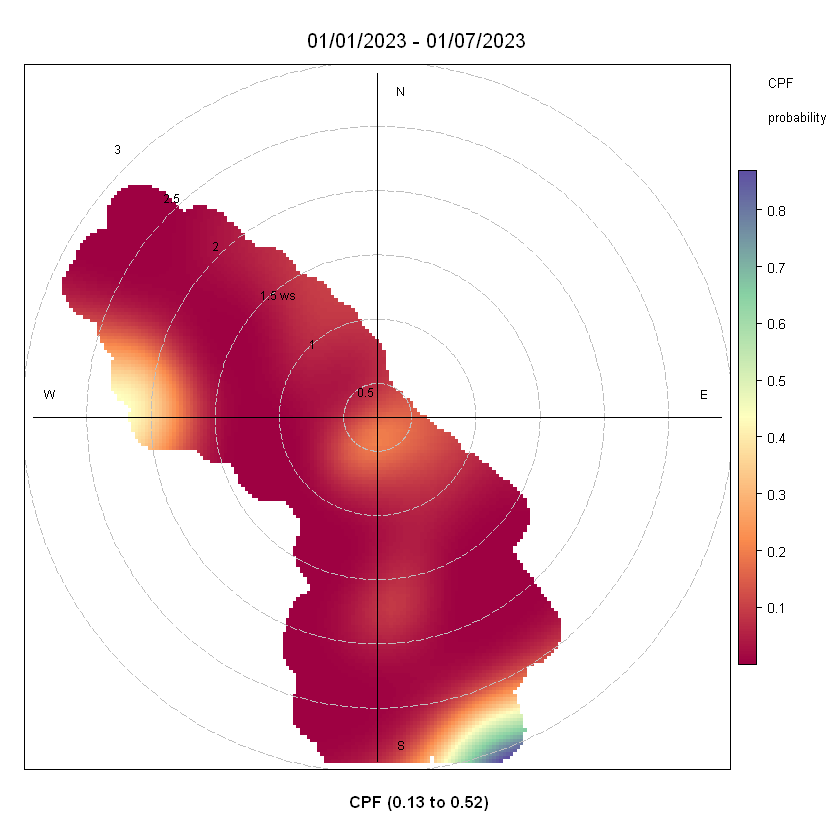

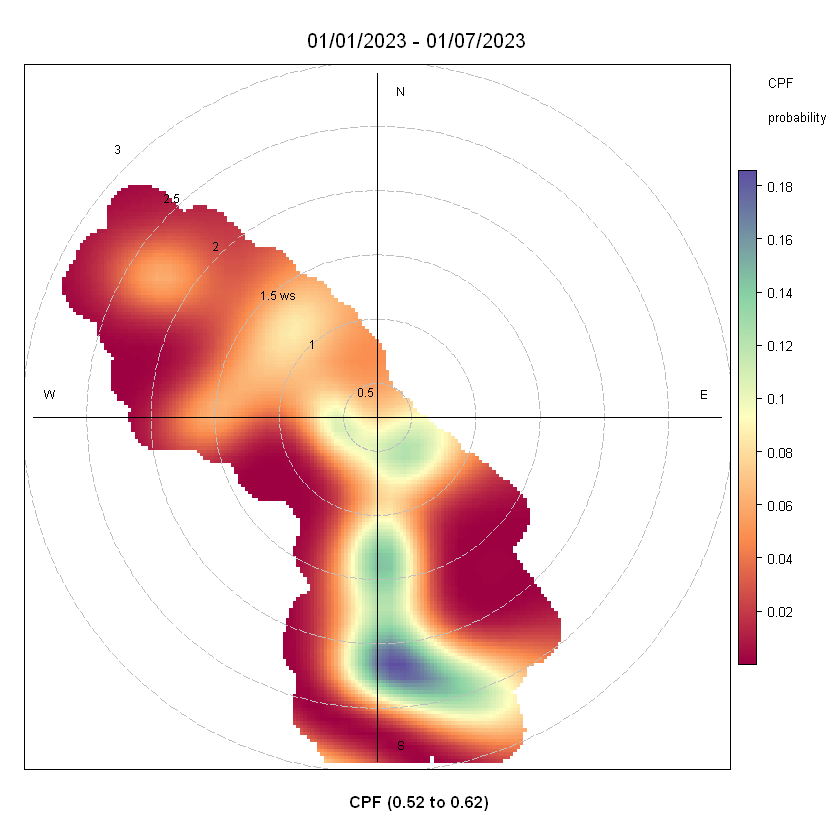

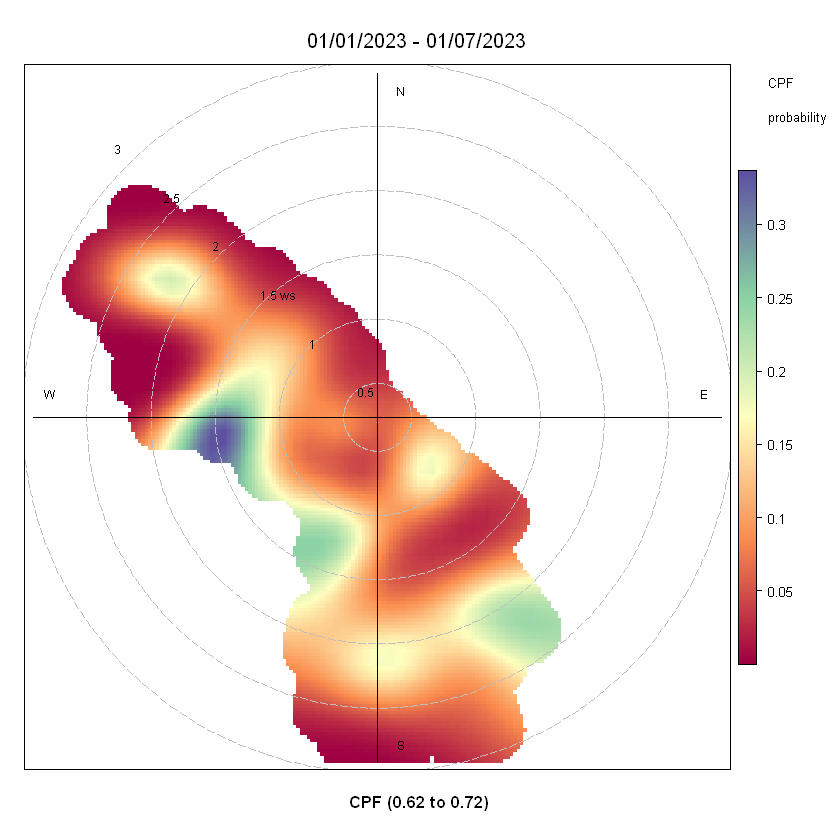

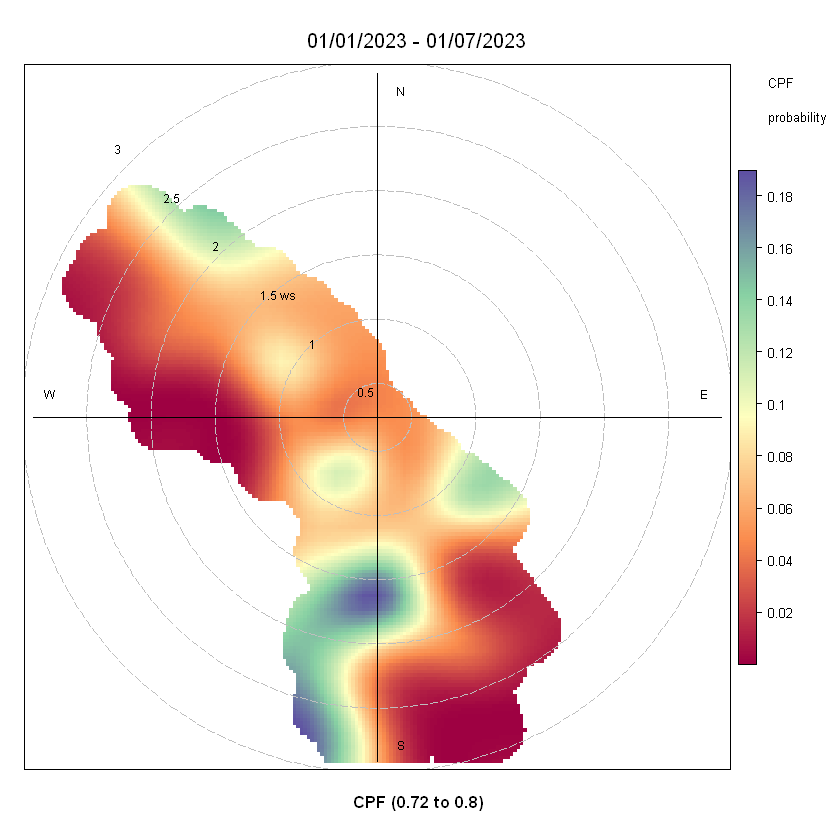

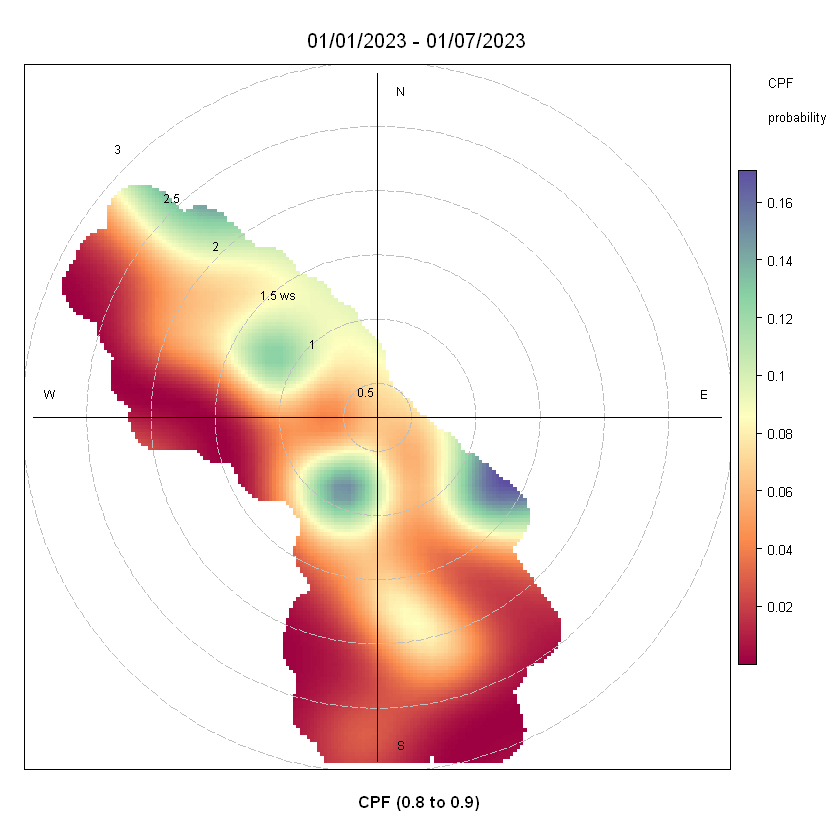

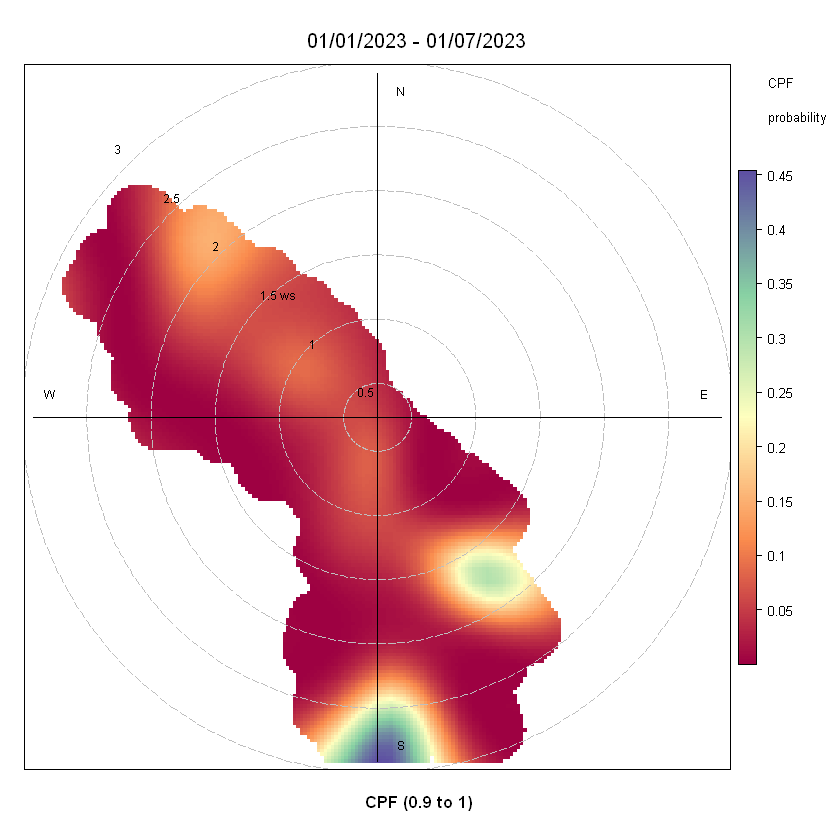

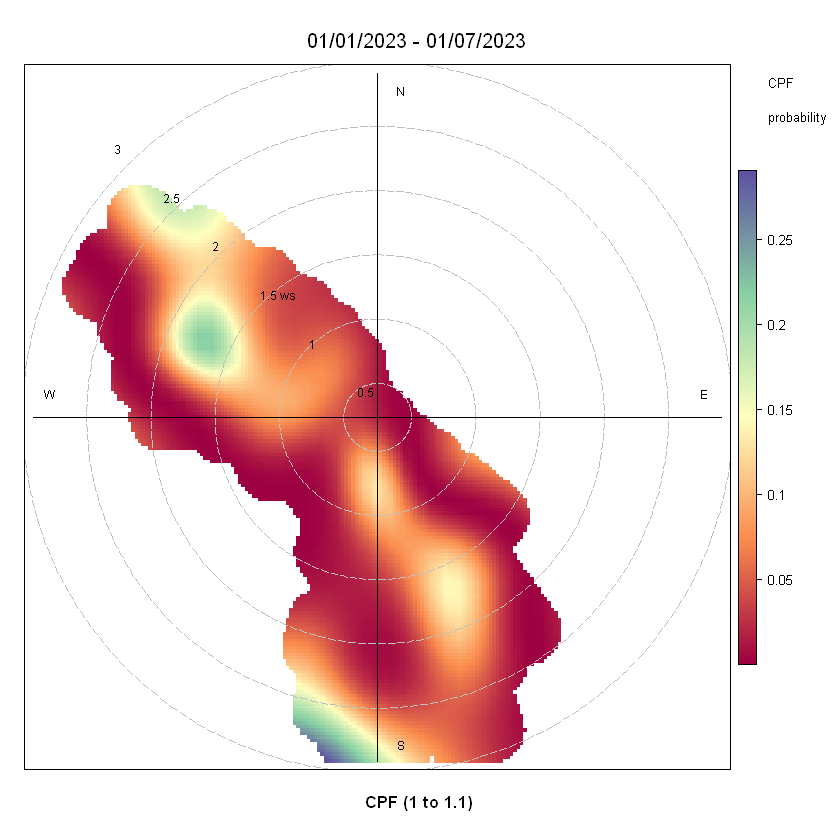

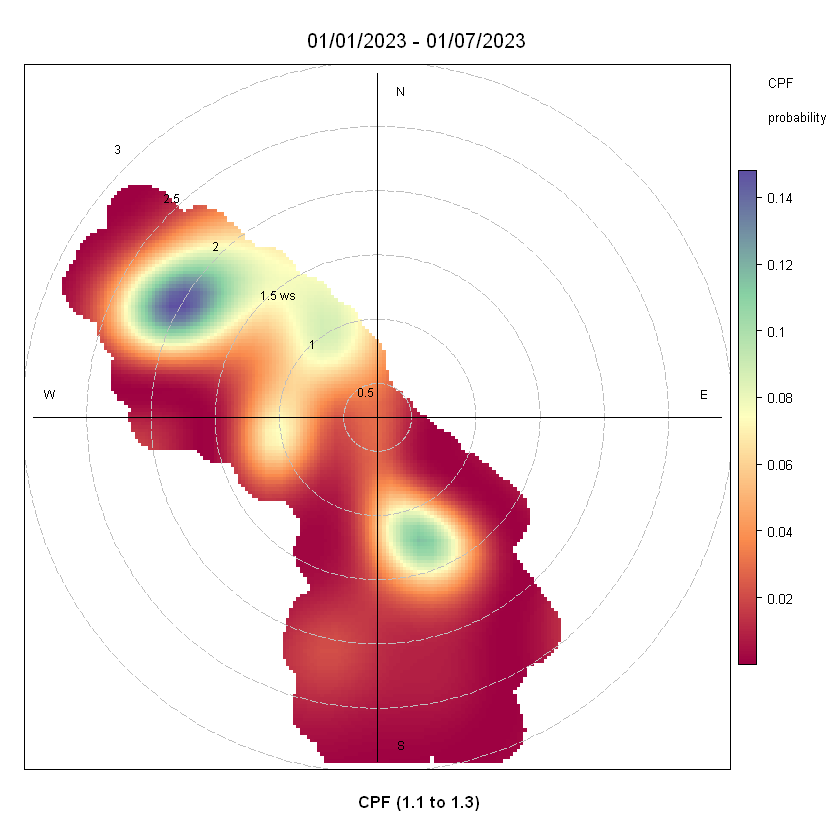

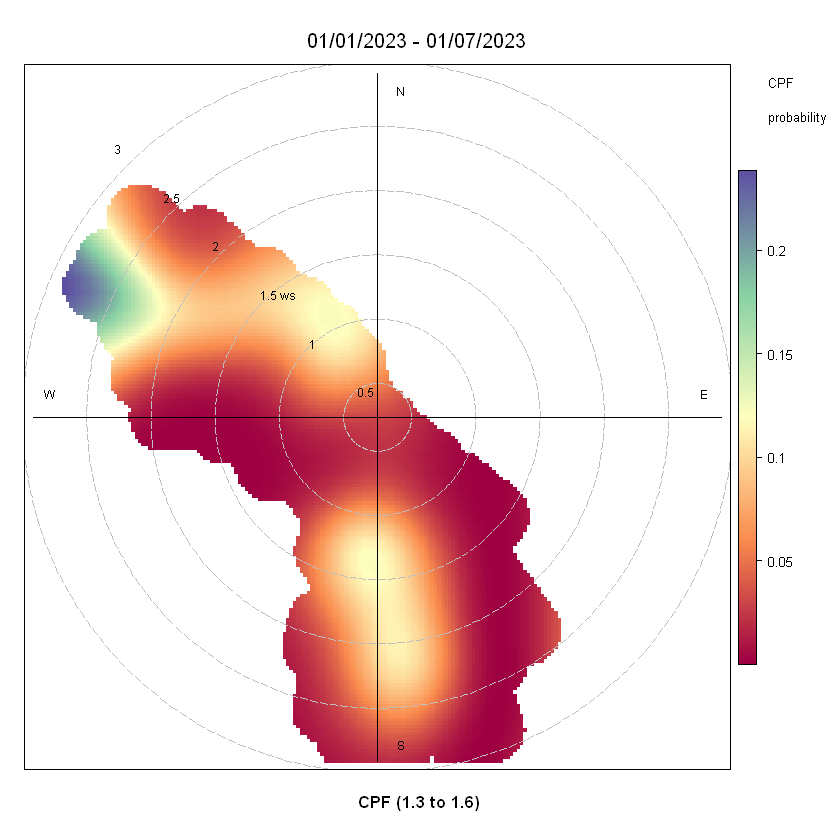

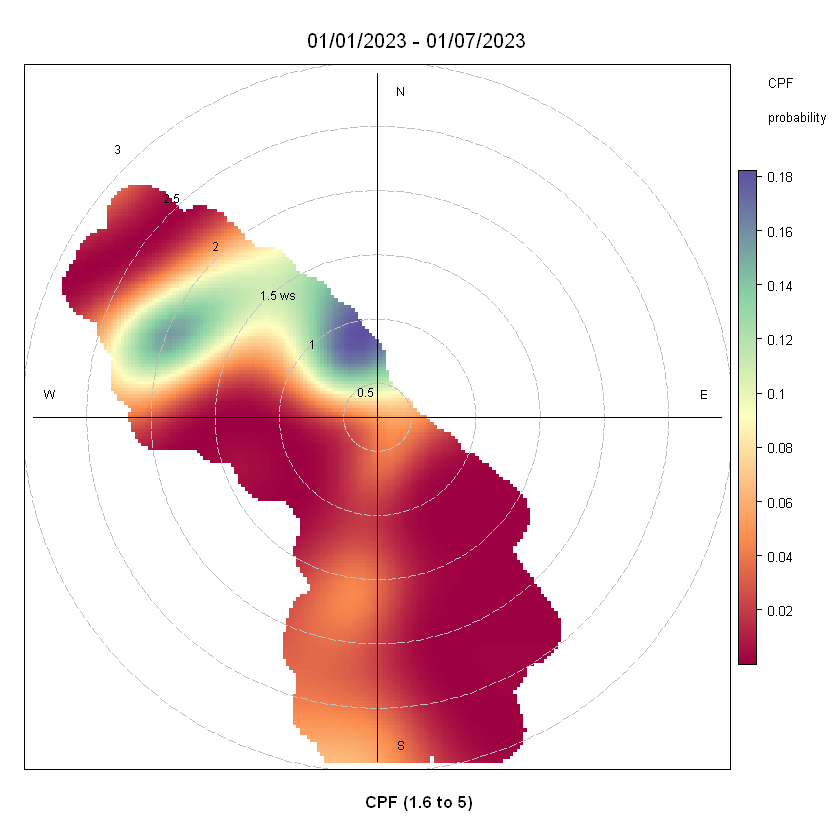

In [27]:
# Without the limits
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(0, 10),main = title,k =30,cols = rev_default_col,key.position = "right",   
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(10, 20),main = title,k =30,cols = rev_default_col,key.position = "right",  
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(20, 30),main = title,k =30,cols = rev_default_col,key.position = "right",  
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(30, 40),main = title,k =30,cols = rev_default_col,key.position = "right", 
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(40, 50),main = title,k =30,cols = rev_default_col,key.position = "right",   
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(50, 60),main = title,k =30,cols = rev_default_col,key.position = "right",  
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(60, 70),main = title,k =30,cols = rev_default_col,key.position = "right",  
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(70, 80),main = title,k =30,cols = rev_default_col,key.position = "right",   
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(80, 90),main = title,k =30,cols = rev_default_col,key.position = "right",
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))
polarPlot(mydata_sample, poll = "pm2.5", stati = "cpf", percentile = c(90, 100),main = title,k =30,cols = rev_default_col,key.position = "right",
          key.footer =NULL,par.settings=list(fontsize=list(text=10)))

In [28]:
#Plotting with different levels of uncertainity

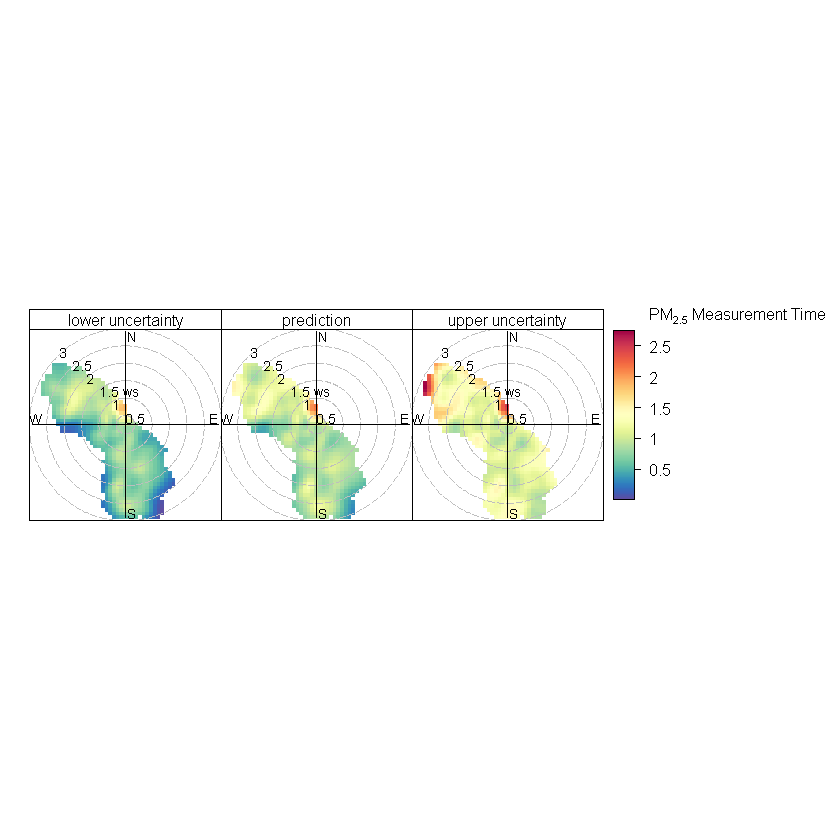

In [29]:
polarPlot(mydata_sample, pollutant = "pm2.5", uncertainty = TRUE,
         key.header = "pm2.5 Measurement Time", key.footer =NULL) 

In [30]:
### Use the actual pollution concentration for this example not the time

In [31]:
mydata_sample$pm0.1 = round(wind_data$pm0.1,digits = 2)

In [32]:
mydata_sample <- mutate(mydata_sample, ratio = pm2.5 / pm0.1)

In [33]:
summary(mydata_sample$ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.036   0.500   0.739   0.878   1.077  26.278   25377 

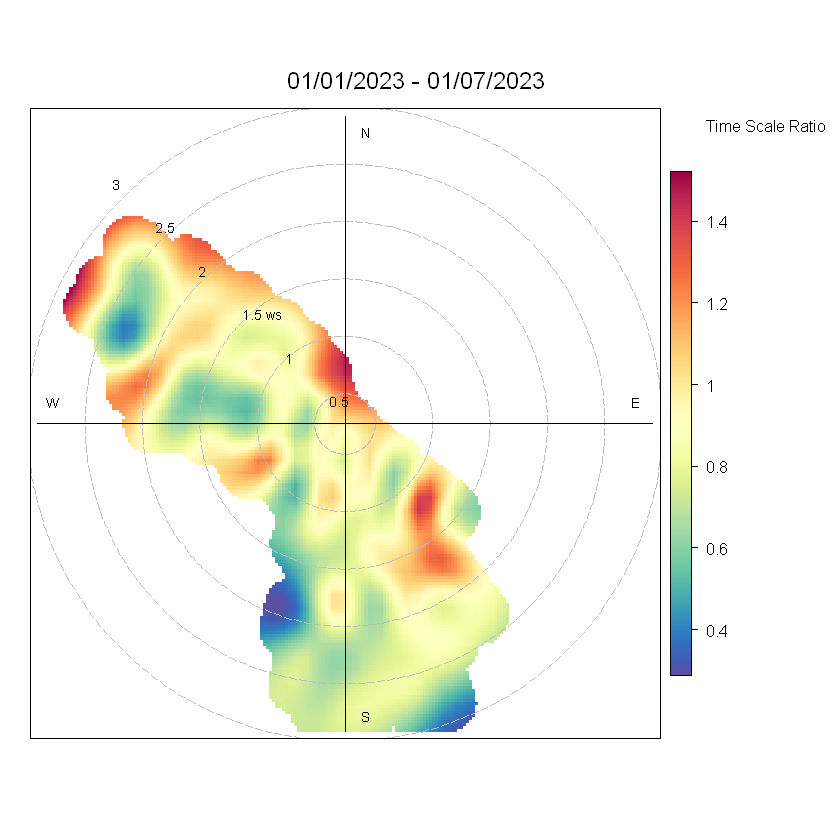

In [34]:
polarPlot(mydata_sample, pollutant = "ratio",main = title,key.header = "Time Scale Ratio", key.footer =NULL)

In [35]:
polarPlot(mydata_sample,
  poll = c("pm2.5", "pm0.1"),
  statistic = "york_slope",
  col = "turbo",
  limits = c(0, 1),
  ws_spread = 1.5,
  wd_spread = 10,
  x_error = "pm10_error", 
  y_error = "pm2.5_error"
)

Can't find the variable(s) pm10_error pm2.5_error 


ERROR: Error in checkPrep(mydata, vars, type, remove.calm = FALSE): 


In [ ]:
#How to access details about each function

?polarPlot